In [1]:
import logging
import pickle
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import(
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import tensorflow as tf
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

2025-03-09 15:17:55.866704: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 15:17:55.869987: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-09 15:17:55.879013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741533475.893419   15310 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741533475.897780   15310 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-09 15:17:55.914355: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
df_raw = pd.read_excel('../data/raw/concrete_data.xls')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [3]:
df_raw.sample(10, random_state=2025)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
565,295.80,0.00,0.00,185.70,0.00,1091.4,769.30,7,14.843729
690,288.00,192.00,0.00,192.00,0.00,932.0,717.80,7,23.523542
636,300.00,0.00,0.00,184.00,0.00,1075.0,795.00,28,26.848195
43,380.00,0.00,0.00,228.00,0.00,932.0,670.00,180,53.104131
720,203.50,305.30,0.00,203.50,0.00,963.4,630.00,90,51.863764
346,213.74,0.00,174.74,154.79,10.16,1053.5,776.35,28,40.148187
149,425.00,106.30,0.00,153.50,16.50,852.1,887.10,56,64.300532
376,376.00,0.00,0.00,214.60,0.00,1003.5,762.36,28,31.971002
605,236.00,0.00,0.00,194.00,0.00,968.0,885.00,3,6.467285
436,172.38,13.61,172.37,156.76,4.14,1006.3,856.40,28,33.687797


In [4]:
df_baking = df_raw.copy()
df_baking.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength']
#df_baking['cement'] = df_baking['cement']*1000 # Changing Scale to Grams/m^3
#df_baking['log_age'] = np.log(df_baking['age'])
#df_baking = df_baking.drop('age',axis=1)
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   blast_furnace_slag    1030 non-null   float64
 2   fly_ash               1030 non-null   float64
 3   water                 1030 non-null   float64
 4   superplasticizer      1030 non-null   float64
 5   coarse_aggregate      1030 non-null   float64
 6   fine_aggregate        1030 non-null   float64
 7   age                   1030 non-null   int64  
 8   compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [5]:
df_train, df_test = train_test_split(df,test_size=0.15,random_state=2025)
df_train, df_val = train_test_split(df_train, test_size=0.15, random_state=2025)
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                743 non-null    float64
 1   blast_furnace_slag    743 non-null    float64
 2   fly_ash               743 non-null    float64
 3   water                 743 non-null    float64
 4   superplasticizer      743 non-null    float64
 5   coarse_aggregate      743 non-null    float64
 6   fine_aggregate        743 non-null    float64
 7   age                   743 non-null    int64  
 8   compressive_strength  743 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 52.4 KB


In [6]:
display(df_train.describe().T)

,count,mean,std,min,25%,50%,75%,max
cement,743.0,279.562409,104.978337,102.000000,190.340000,266.000000,349.000000,540.000000
blast_furnace_slag,743.0,76.968856,88.021319,0.000000,0.000000,24.000000,145.000000,359.400000
fly_ash,743.0,53.211790,64.184574,0.000000,0.000000,0.000000,118.270000,200.100000
water,743.0,182.272826,21.613660,121.750000,165.620000,185.700000,193.000000,247.000000
superplasticizer,743.0,6.122151,6.087890,0.000000,0.000000,6.130000,10.160000,32.200000
coarse_aggregate,743.0,969.783701,76.747024,801.000000,932.000000,967.000000,1028.100000,1134.300000
fine_aggregate,743.0,772.930956,80.088970,594.000000,728.950000,778.450000,825.000000,992.600000
age,743.0,43.978466,59.487769,1.000000,7.000000,28.000000,56.000000,365.000000
compressive_strength,743.0,35.668330,16.816932,2.331808,23.582049,33.798114,45.845328,79.986111


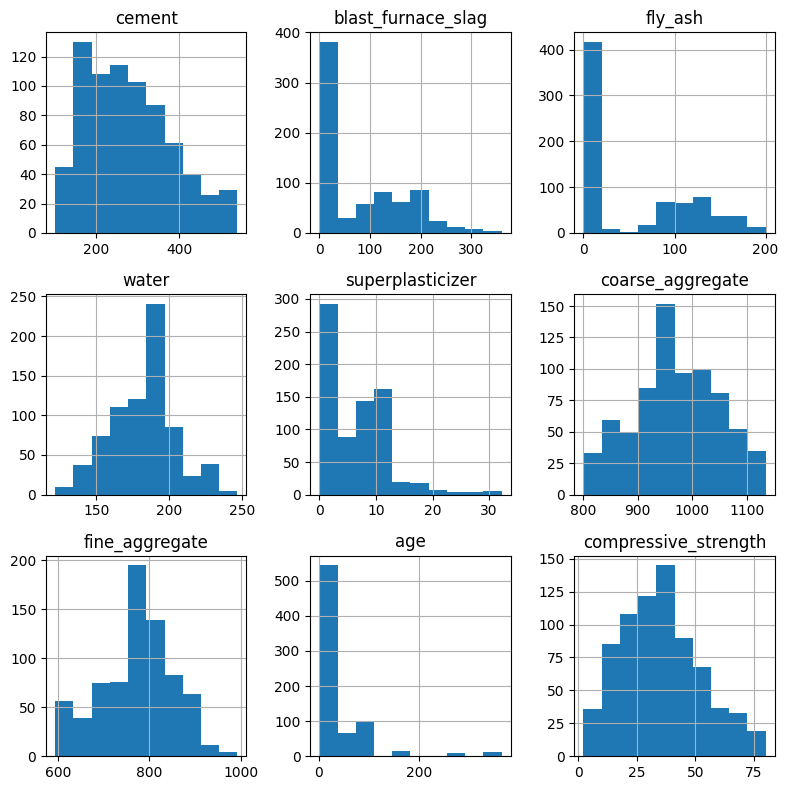

In [7]:
df_train.hist(figsize=(8,8))
plt.tight_layout()
plt.show()

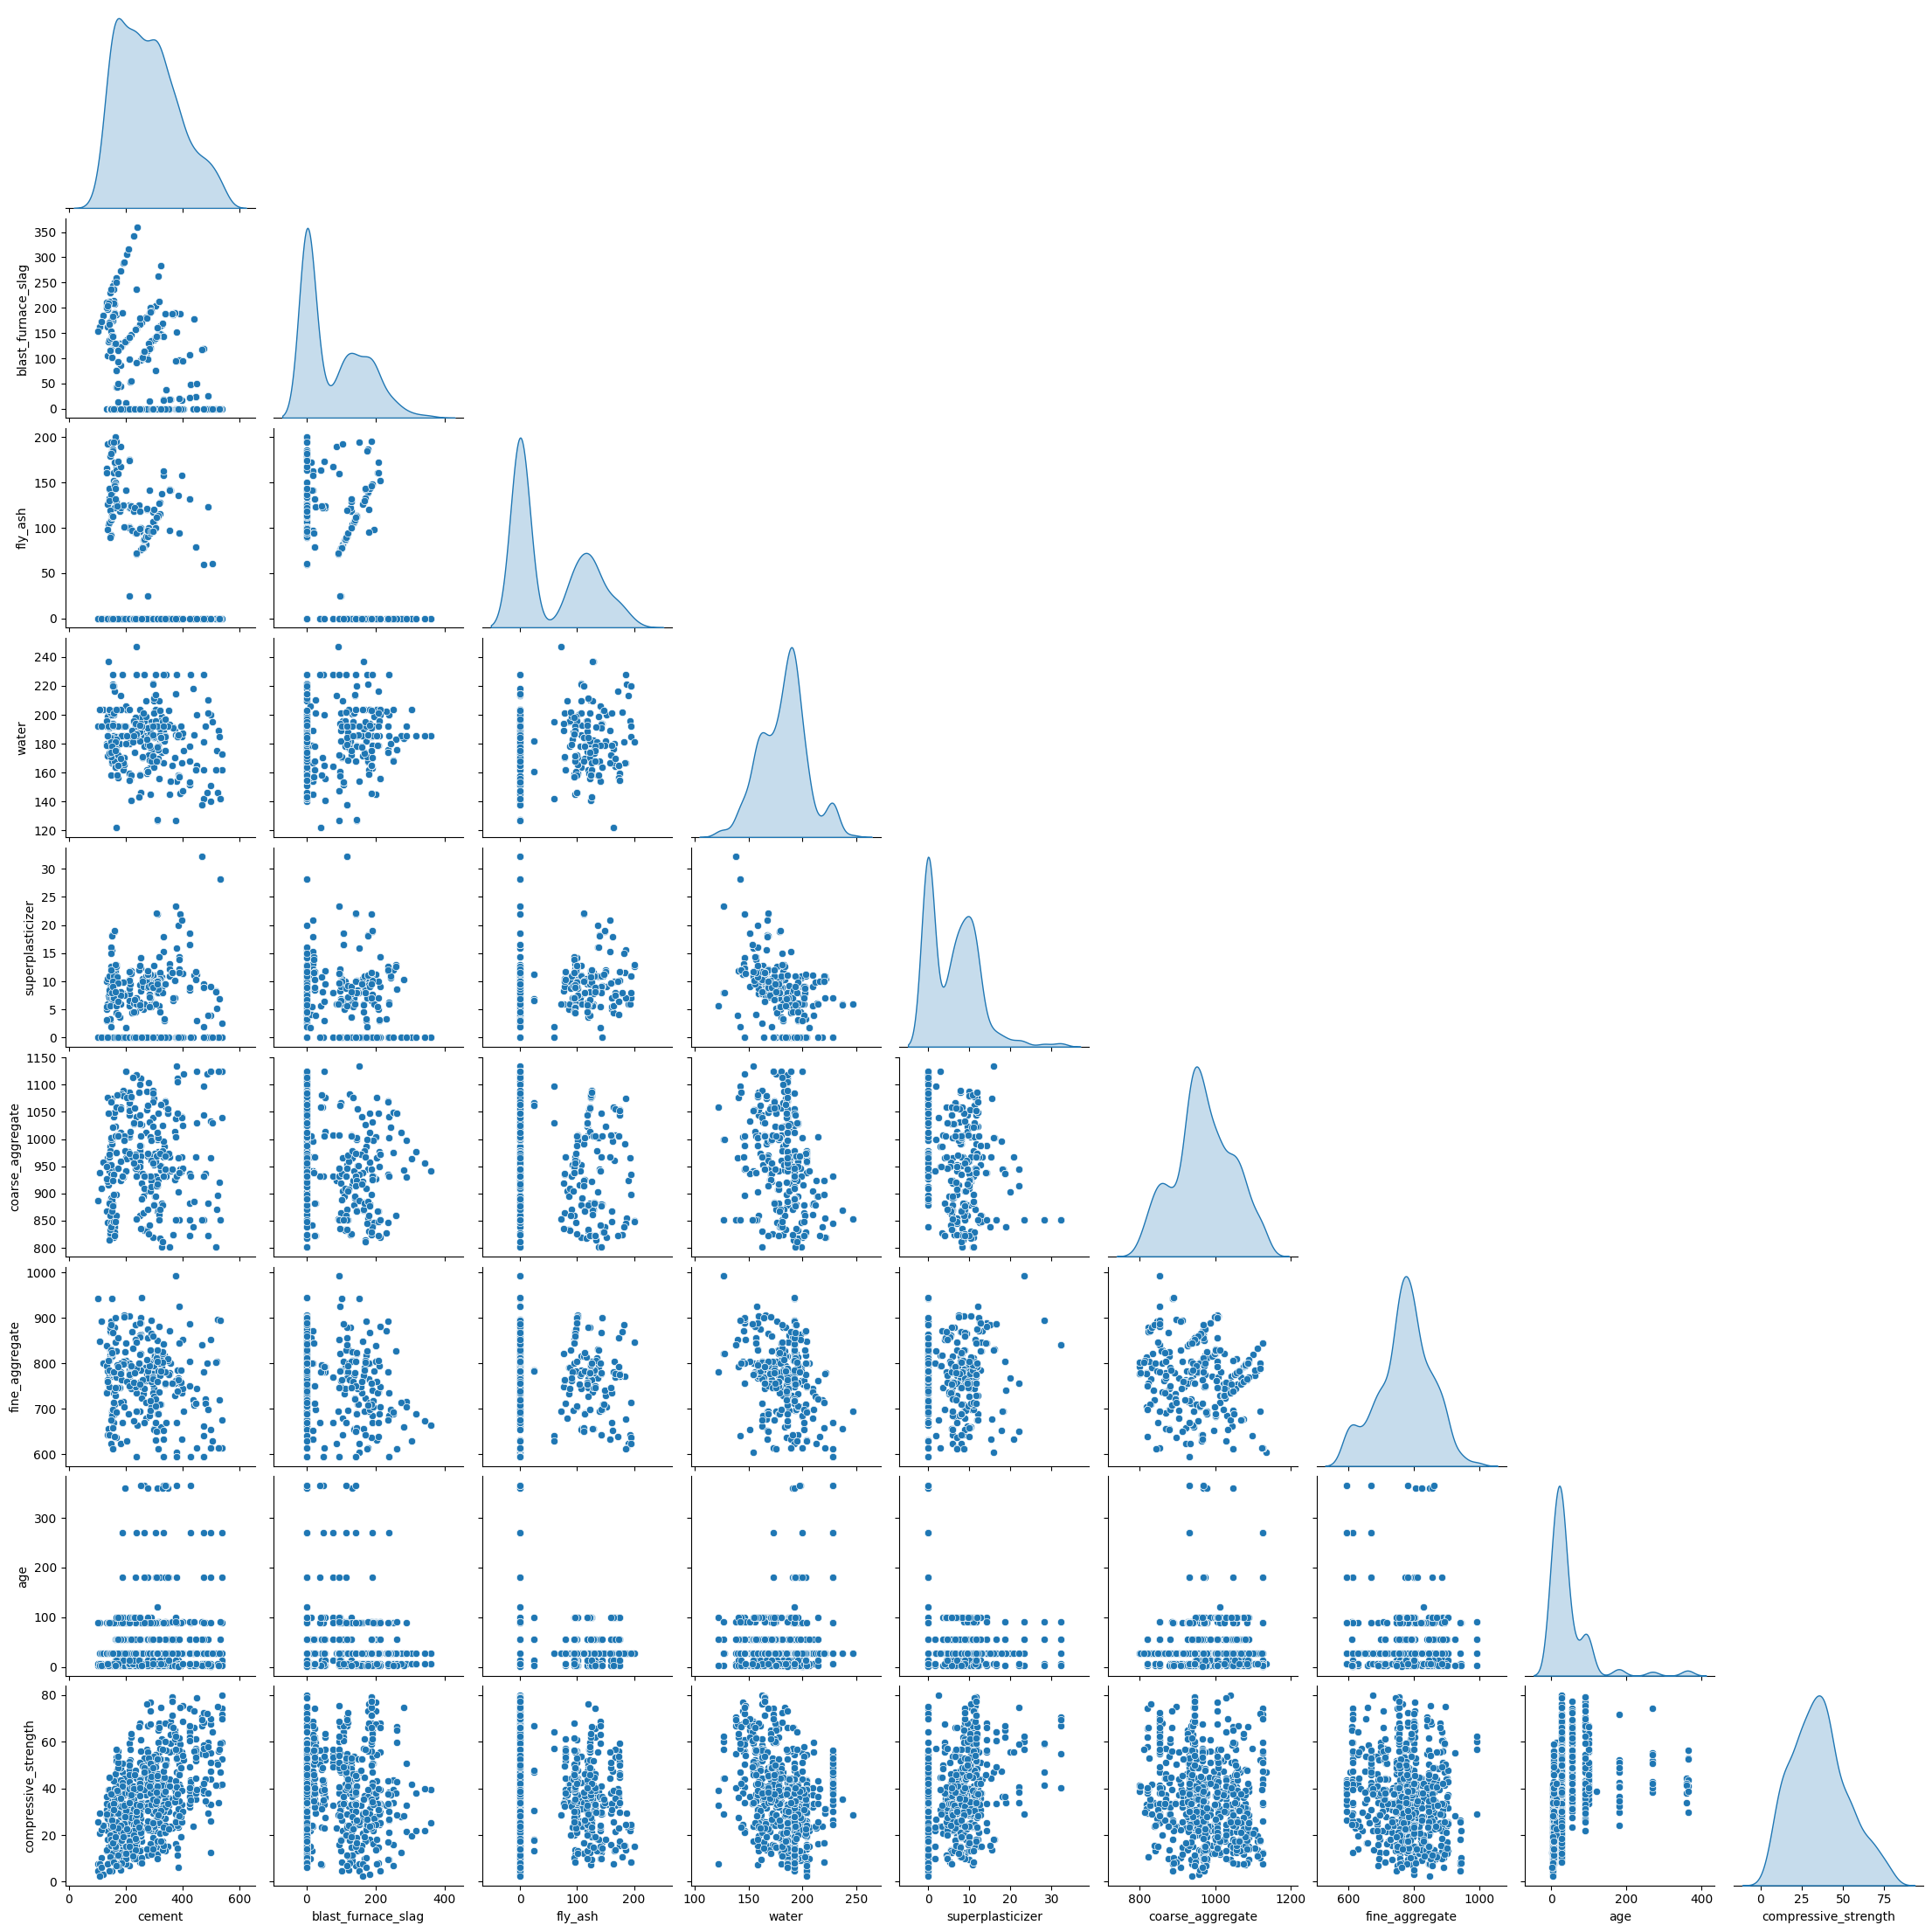

In [8]:
sns.pairplot(df_train, diag_kind='kde', corner=True)
plt.show()

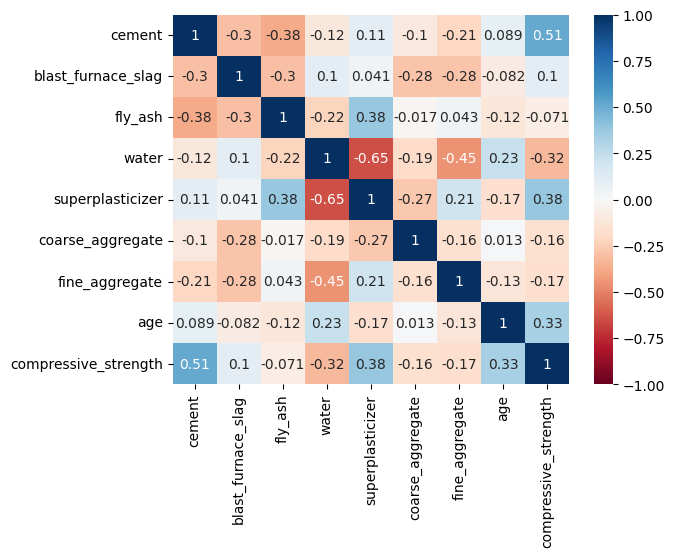

In [9]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

In [10]:
X_train = df_train.drop('compressive_strength', axis=1)
y_train = df_train['compressive_strength']
X_val = df_val.drop('compressive_strength', axis=1)
y_val = df_val['compressive_strength']
X_test = df_test.drop('compressive_strength', axis=1)
y_test = df_test['compressive_strength']

In [11]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)
X_test_sc = scaler.transform(X_test)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(X_train_sc.shape[1],)),  # Definición explícita de la entrada
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(6, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

2025-03-09 15:18:03.821772: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231 (924.00 B)

 Trainable params: 231 (924.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [15]:
history = model.fit(
    X_train_sc,
    y_train,
    epochs=50,
    validation_data=(X_val_sc, y_val),
    batch_size=8
)

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1584.1840 - mse: 1584.1840 - val_loss: 1482.8429 - val_mse: 1482.8429
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1313.3347 - mse: 1313.3347 - val_loss: 853.0446 - val_mse: 853.0446
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 586.3906 - mse: 586.3906 - val_loss: 242.0383 - val_mse: 242.0383
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 251.6733 - mse: 251.6733 - val_loss: 220.3422 - val_mse: 220.3422
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 245.2076 - mse: 245.2076 - val_loss: 203.0114 - val_mse: 203.0114
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 226.8243 - mse: 226.8243 - val_loss: 188.4306 - val_mse: 188.4306
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 201.2260 - mse: 201.2260 - val_loss: 175.3563 - val_mse: 175.3563
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.6978 - mse: 196.6978 - val_loss: 164.0162 - val_mse: 164.0162
Ep

In [16]:
metrics = model.evaluate(X_test_sc, y_test)
metrics

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 119.8655 - mse: 119.8655


[124.72936248779297, 124.72936248779297]

In [17]:
y_hat = model.predict(X_test_sc)
y_hat = y_hat.reshape(-1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [18]:
print(f'MSE: {mean_squared_error(y_test, y_hat)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_hat))}')
print(f'R2: {r2_score(y_test, y_hat)}')

MSE: 124.72936386966495
RMSE: 11.16823011357059
R2: 0.5588220460033964


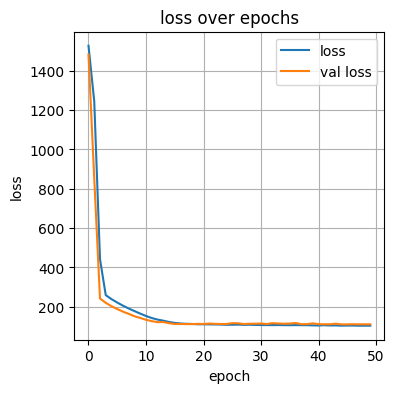

In [19]:
plt.figure(figsize=(4,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss over epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

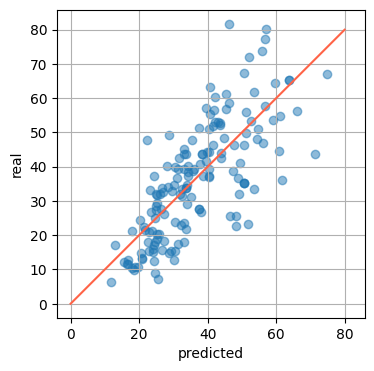

In [20]:
plt.figure(figsize=(4, 4))
plt.scatter(x=y_hat, y=y_test, alpha=0.5)
plt.plot([0, 80], [0, 80], color='tomato')  # Faltaba una coma aquí
plt.xlabel('predicted')
plt.ylabel('real')
plt.grid(True)
plt.axis('square')
plt.show()